In [221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import pow,sqrt

np.random.seed(40)

# Reading Datafile

In [222]:
df = pd.read_csv('data.txt',delimiter='\s+',header=None)

dataset = df.values
shape = dataset.shape

shape

(1000, 100)

# PCA and Dimentionality Reduction

In [223]:
def PCA_DR(dataset):
    mean_arr = np.array([np.mean(dataset[:,i]) for i in range(dataset.shape[1])])
    co_var_matrix = np.zeros((dataset.shape[1],dataset.shape[1]))
    dataset_len = dataset.shape[0]
    
    for i in range(dataset.shape[1]):
        for j in range(dataset.shape[1]):
            X = dataset[:,i] - mean_arr[i]
            Y = dataset[:,j] - mean_arr[j]
            Z = np.multiply(X,Y)
            total = np.sum(Z,axis=0)
            co_var_matrix[i][j] = total/(dataset_len-1)
            
    eigen_value,eigen_vector = np.linalg.eig(co_var_matrix)
    
    eigen_vector = eigen_vector.transpose()
    sorted_eigen_value = np.sort(eigen_value)
    
    max_index = np.argmax(eigen_value)
    second_max = np.where(eigen_value==sorted_eigen_value[-2])[0][0]
    
    feature_vector1 = eigen_vector[max_index]
    feature_vector2 = eigen_vector[second_max]
    
    X = np.dot(dataset,feature_vector1.T).reshape(-1,1)
    Y = np.dot(dataset,feature_vector2.T).reshape(-1,1)
    
    return np.concatenate((X,Y),axis=1)

In [224]:
final_dataset = PCA_DR(dataset)

In [225]:
def plot_reduced_dataset(dataset):
    X = dataset[:,0]
    Y = dataset[:,1]
    
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.plot(X,Y,'bo')

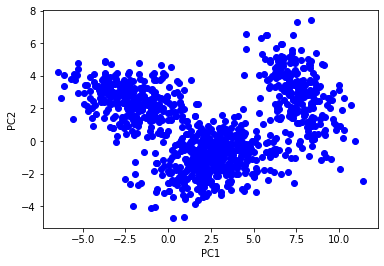

In [226]:
plot_reduced_dataset(final_dataset)

# EM Algorithm

In [227]:
class EMAlgorithm:
    def __init__(self,K):
        self.K = K
        
        # initialize weight
        self.w = np.random.uniform(0,1,K)
        total = np.sum(self.w)
        self.w = [x/total for x in self.w]
        
    def gaussian_likelihood(self,x,mean,co_var_matrix):
        inv = np.linalg.inv(co_var_matrix)
        det = abs(np.linalg.det(co_var_matrix))
        d = (1/sqrt(pow((2*3.1416),self.dataset.shape[1])*det))
        likelihood = []

        for i in x:
            a = np.dot(inv,i-mean)
            b = np.dot((i-mean),a)
            c = np.exp(-0.5*b)
            l = c*d
            likelihood.append(l)

        return likelihood
    
    def fit(self,dataset):
        self.dataset = dataset
        self.means = np.random.uniform(-1,1,(self.K,dataset.shape[1]))
        self.co_var_matrices = np.random.uniform(-1,1,(self.K,dataset.shape[1],dataset.shape[1]))
        
        prev = 0
        
        while True:
            class_wise_likelihood = [ self.gaussian_likelihood(dataset,self.means[i],self.co_var_matrices[i]) for i in range(self.K)]
            class_wise_likelihood = np.array(class_wise_likelihood)
            
            self.likelihood = class_wise_likelihood.transpose()
            log_likelihood = 0
        
            for i in range(self.dataset.shape[0]):
                t = 0
                for j in range(self.K):
                    t += self.w[j]*self.likelihood[i][j]
                log_likelihood += np.log(t)
            
            diff = abs(prev-log_likelihood)
        
            if(diff<1e-6):
                break

            prev = log_likelihood
            
            
            # E Step
            p = []
            
            for i in range(dataset.shape[0]):
                p_i = np.array([self.w[k]*class_wise_likelihood[k][i] for k in range(self.K)])
                p_i = p_i/np.sum(p_i)
                p.append(p_i)
                
            p = np.array(p)
            # M Step
            
            # update means
            
            for k in range(self.K):
                z = 0
                for i in range(self.dataset.shape[0]):
                    z += p[:,k][i]*dataset[i]
                total = np.sum(p[:,k])
                self.means[k] = z/total
                
            # update co_var
            
            for k in range(self.K):
                co_var_matrix = 0
                for i in range(self.dataset.shape[0]):
                    arr = np.array(self.dataset[i]-self.means[k]).reshape(-1,1)
                    cross = p[i][k]*arr*arr.T
                    co_var_matrix += cross
                self.co_var_matrices[k] = co_var_matrix/np.sum(p[:,k])
                
            # update weights
            
            for k in range(self.K):
                self.w[k] = np.sum(p[:,k])/self.dataset.shape[0]
                        
        return
    
    def predict(self):
        index = []

        for i in range(self.dataset.shape[0]):
            index.append(np.argmax(self.likelihood[i]))

        index = np.array(index)
        class_wise_dataset = []

        for k in range(self.K):
            class_wise_dataset.append(np.array(self.dataset[np.where(index==k)]))
        
        colors = ['ro','go','bo']

        plt.title('EM Algorithm')
        plt.xlabel('PC1')
        plt.ylabel('PC2')

        for k in range(self.K):
            arr = class_wise_dataset[k].transpose()
            X = arr[0]
            Y = arr[1]
            plt.plot(X,Y,colors[k])

In [ ]:
model = EMAlgorithm(3)
model.fit(final_dataset)

In [ ]:
model.predict()